In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker

%matplotlib notebook

In [27]:
npts = np.array([100000, 200000, 400000, 1000000, 2000000])

corrfunc_times = np.array([
    0.09213217099507649, 0.1412961483001709, 0.25974472363789874, 
    0.8910528024037679, 2.9381796518961587])
bfcuda_times = np.array([
    0.4588676293690999, 1.4373432795206706, 5.252676089604695, 
    34.824121952056885, 140.4756192366282])
dchop_times = np.array([
    0.013611555099487305, 0.044542392094930015, 0.16126656532287598, 
    0.9589675267537435, 3.808154503504435])

bfshmem_times = np.array([
    0.37405792872111004, 0.7228797276814779, 2.2273117701212564, 
    13.484556198120117, 54.00245404243469])

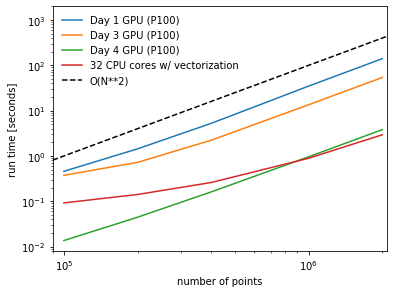

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6*6/8))
xlim = ax.set_xlim(0.9e5, 2.1e6)
ylim = ax.set_ylim(0.008, 2000)
ax.loglog()

ax.plot(npts, bfcuda_times, label='Day 1 GPU (P100)')
ax.plot(npts, bfshmem_times, label='Day 3 GPU (P100)')
ax.plot(npts, dchop_times, label='Day 4 GPU (P100)')
ax.plot(npts, corrfunc_times, label='32 CPU cores w/ vectorization')

xn = np.array([0.9e5, 2.1e6])
yn = (xn/1e5)**2
ax.plot(xn, yn, label='O(N**2)', linestyle='dashed', color='black')

xlabel = ax.set_xlabel('number of points')
ylabel = ax.set_ylabel('run time [seconds]')

leg = ax.legend(loc='upper left', frameon=False)

fig.savefig('cpu_vs_cuda_timing.png', bbox_extra_artists=[xlabel, ylabel], 
            bbox_inches='tight', dpi=200)